In [1]:
# dependencies
import chardet
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func


In [2]:
# Load in file
# Store filepath in a variable
YOUTUBE_PATH = "Resources/global_youtube_stats.csv"

In [3]:
with open(YOUTUBE_PATH, 'rb') as csv_file:
    raw_content = csv_file.read()
    chardet_result = chardet.detect(raw_content)
print(chardet_result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7289153199558486, 'language': ''}


In [4]:
# Read and display the CSV with Pandas
df = pd.read_csv(YOUTUBE_PATH, encoding=chardet_result['encoding'])
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   Abbreviation                             554 non-null    object 
 9   channel_type                             554 non-null    object 
 10  video_views_rank                         554 non-null  

In [8]:
# pd.set_option('display.max_rows', None)  # Set the option to display all rows
#print(df)

In [9]:
# Assuming your DataFrame is named df
# Rename specific columns
cleaned_df = df.rename(columns={
    'Gross tertiary education enrollment (%)': 'gross education enrollment percentage',
    'Youtuber': 'youtuber',
    'Title': 'title',
    'Abbreviation': 'abbreviation',
    'Country' : 'country',
    'Population': 'population',
    'Unemployment rate': 'unemployment rate',
    'Urban_population' : 'urban_population',
    'Latitude' : 'latitude',
    'Longitude' : 'longitude',
    'video views' : 'video_views'
    })

# Display the DataFrame with renamed columns
cleaned_df.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross education enrollment percentage,population,unemployment rate,urban_population,latitude,longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


In [10]:
# Specify the URI for the cleaned database
db_uri = 'sqlite:///data.db'

# Create an engine using the specified URI
engine = create_engine(db_uri)

# Write the cleaned DataFrame to a SQLite database table named 'my_table'
cleaned_df.to_sql('my_table', engine, if_exists='replace', index=False)

# Confirm that the data has been successfully written to the database
df_from_db = pd.read_sql('my_table', engine)
print(df_from_db)

     rank                    youtuber  subscribers   video_views  \
0       1                    T-Series    245000000  2.280000e+11   
1       3                     MrBeast    166000000  2.836884e+10   
2       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
3       5                   SET India    159000000  1.480000e+11   
4       9                 Like Nastya    106000000  9.047906e+10   
..    ...                         ...          ...           ...   
549   990                   Migos ATL     12400000  6.993406e+09   
550   991               Natan por Aï¿     12300000  9.029610e+09   
551   992    Free Fire India Official     12300000  1.674410e+09   
552   994                 RobTopGames     12300000  3.741235e+08   
553   995                Make Joke Of     12300000  2.129774e+09   

           category                       title  uploads        country  \
0             Music                    T-Series    20082          India   
1     Entertainment              

In [11]:
# INSPECT to confirm existence
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

print(tables)

['my_table']


In [40]:
# 1A Define the SQL query top channels by subscribers
query = """
SELECT Rank, Youtuber, Subscribers, country, channel_type
FROM my_table
GROUP BY channel_type
ORDER BY Subscribers DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,country,channel_type
0,1,T-Series,245000000,India,Music
1,3,MrBeast,166000000,United States,Entertainment
2,4,Cocomelon - Nursery Rhymes,162000000,United States,Education
3,9,Like Nastya,106000000,Russia,People
4,12,WWE,96000000,United States,Sports
5,30,Movieclips,59500000,United States,Film
6,34,Aaj Tak,57600000,India,News
7,45,JuegaGerman,48100000,Chile,Games
8,64,Shakira,43500000,Colombia,Howto
9,79,CarryMinati,39200000,India,Comedy


In [42]:
# 1B Define the SQL query top channels by views
query = """
SELECT Rank, Youtuber, video_views, subscribers, country, channel_type
FROM my_table
GROUP BY channel_type
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,video_views,subscribers,country,channel_type
0,1,T-Series,2.280000e+11,245000000,India,Music
1,4,Cocomelon - Nursery Rhymes,1.640000e+11,162000000,United States,Education
2,9,Like Nastya,9.047906e+10,106000000,Russia,People
3,12,WWE,7.742847e+10,96000000,United States,Sports
4,30,Movieclips,5.931647e+10,59500000,United States,Film
5,3,MrBeast,2.836884e+10,166000000,United States,Entertainment
6,64,Shakira,2.756876e+10,43500000,Colombia,Howto
7,34,Aaj Tak,2.530775e+10,57600000,India,News
8,276,That Little Puff,2.028969e+10,23700000,United States,Animals
9,45,JuegaGerman,1.463171e+10,48100000,Chile,Games


In [45]:
# 2 Define the SQL query top channels by country
query = """
SELECT Rank, Youtuber, subscribers, video_views, country, channel_type, category
FROM my_table
GROUP BY country
ORDER BY channel_type DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,video_views,country,channel_type,category
0,424,FIFA,19400000,5.529132e+09,Switzerland,Sports,Sports
1,479,How Ridiculous,18000000,9.601137e+09,Australia,Sports,Sports
2,77,shfa2 - ï¿½ï¿½,39700000,2.388482e+10,United Arab Emirates,People,People & Blogs
3,9,Like Nastya,106000000,9.047906e+10,Russia,People,People & Blogs
4,72,Kimberly Loaiza,41300000,5.603112e+09,Mexico,People,People & Blogs
5,51,A4,46300000,2.293663e+10,Cuba,People,Gaming
6,40,Ed Sheeran,53500000,3.036768e+10,United Kingdom,Music,Music
7,260,netd mï¿½ï¿,24100000,5.610609e+10,Turkey,Music,Music
8,14,BLACKPINK,89800000,3.214460e+10,South Korea,Music,People & Blogs
9,900,DJ Khaled,13100000,6.637821e+09,Samoa,Music,Music


In [49]:
# 4 Define the SQL query top channels by country
query = """
SELECT rank, youtuber, subscribers, channel_type, category, country, SUM(video_views) AS total_views
FROM my_table
GROUP BY category
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,channel_type,category,country,total_views
0,1,T-Series,245000000,Music,Music,India,1.937407e+12
1,4,Cocomelon - Nursery Rhymes,162000000,Education,Education,United States,6.107155e+11
2,5,SET India,159000000,Entertainment,Shows,India,4.379051e+11
3,9,Like Nastya,106000000,People,People & Blogs,Russia,7.634447e+11
4,12,WWE,96000000,Sports,Sports,United States,1.320809e+11
5,30,Movieclips,59500000,Film,Film & Animation,United States,3.899961e+11
6,3,MrBeast,166000000,Entertainment,Entertainment,United States,1.813469e+12
7,34,Aaj Tak,57600000,News,News & Politics,India,2.129565e+11
8,276,That Little Puff,23700000,Animals,Pets & Animals,United States,3.490263e+10
9,71,Ishtar Music,41400000,Music,Trailers,India,3.326272e+10


In [13]:
# Define the SQL query
query = """
SELECT Rank, Youtuber, Subscribers, uploads, country
FROM my_table
ORDER BY Subscribers DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,uploads,country
0,1,T-Series,245000000,20082,India
1,3,MrBeast,166000000,741,United States
2,4,Cocomelon - Nursery Rhymes,162000000,966,United States
3,5,SET India,159000000,116536,India
4,9,Like Nastya,106000000,493,Russia
5,10,Vlad and Niki,98900000,574,United States
6,11,Zee Music Company,96700000,8548,India
7,12,WWE,96000000,70127,United States
8,14,BLACKPINK,89800000,543,South Korea
9,16,Sony SAB,83000000,71270,India


In [14]:
# Define the SQL query
query = """
SELECT Rank, Youtuber, Subscribers, video_views, country
FROM my_table
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,video_views,country
0,1,T-Series,245000000,2.280000e+11,India
1,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,United States
2,5,SET India,159000000,1.480000e+11,India
3,16,Sony SAB,83000000,1.010000e+11,India
4,9,Like Nastya,106000000,9.047906e+10,Russia
5,12,WWE,96000000,7.742847e+10,United States
6,10,Vlad and Niki,98900000,7.718017e+10,United States
7,22,Zee TV,70500000,7.313905e+10,India
8,27,Colors TV,64600000,6.151091e+10,India
9,30,Movieclips,59500000,5.931647e+10,United States


In [28]:
# Define the SQL query
query = """
SELECT Rank, category, SUM(video_views) AS total_views	
FROM my_table
Group BY category
ORDER BY total_views DESC
LIMIT 100
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(50)

,rank,category,total_views
0,1,Music,1.937407e+12
1,3,Entertainment,1.813469e+12
2,9,People & Blogs,7.634447e+11
3,4,Education,6.107155e+11
4,5,Shows,4.379051e+11
5,30,Film & Animation,3.899961e+11
6,45,Gaming,3.893691e+11
7,79,Comedy,3.695646e+11
8,34,News & Politics,2.129565e+11
9,12,Sports,1.320809e+11


In [28]:
# Define the SQL query
query = """
SELECT Rank, category, SUM(video_views) AS total_views	
FROM my_table
Group BY category
ORDER BY total_views DESC
LIMIT 100
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(50)

,rank,category,total_views
0,1,Music,1.937407e+12
1,3,Entertainment,1.813469e+12
2,9,People & Blogs,7.634447e+11
3,4,Education,6.107155e+11
4,5,Shows,4.379051e+11
5,30,Film & Animation,3.899961e+11
6,45,Gaming,3.893691e+11
7,79,Comedy,3.695646e+11
8,34,News & Politics,2.129565e+11
9,12,Sports,1.320809e+11


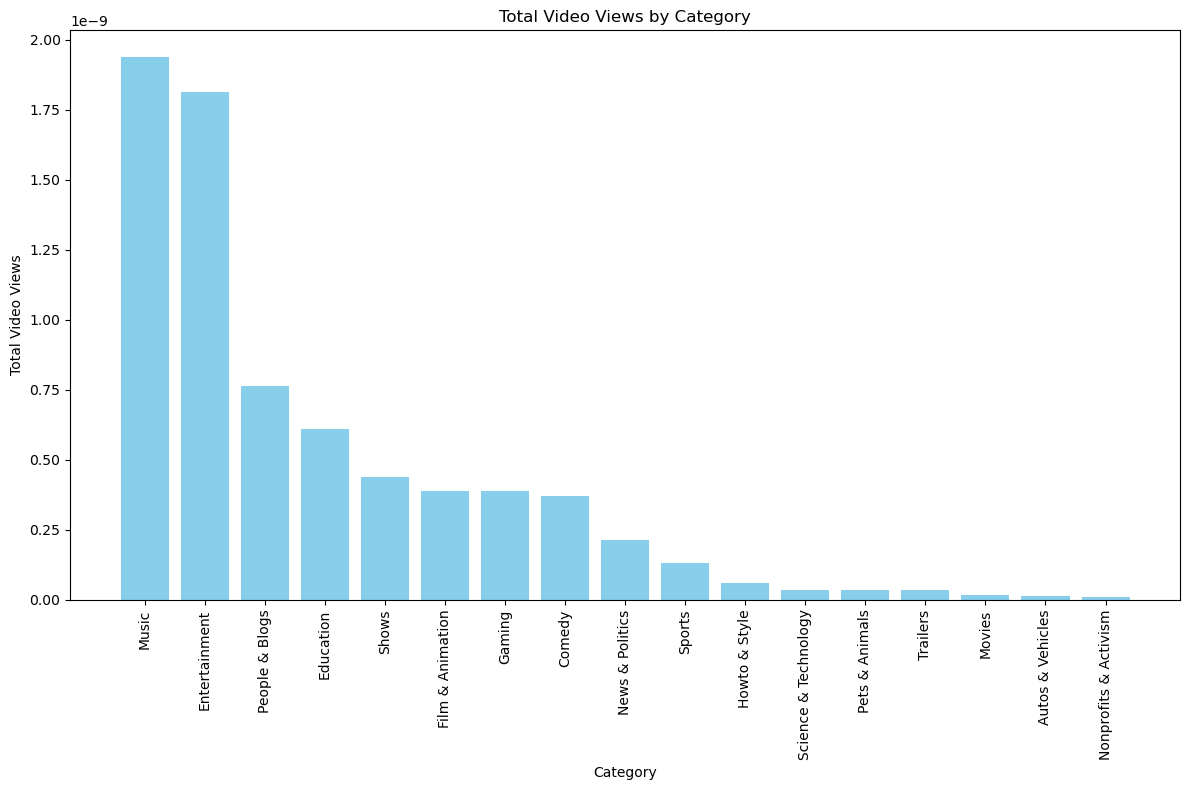

In [34]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
plt.bar(df['category'], df['total_views'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Video Views')
plt.title('Total Video Views by Category')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.tight_layout()

# Display the bar graph
plt.show()

In [37]:
query = """
SELECT channel_type, youtuber, subscribers, category, country, SUM(video_views) AS total_views
FROM my_table
GROUP BY channel_type
ORDER BY total_views DESC
LIMIT 25;
"""
# Execute the query and read the results into a DataFrame
# df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,category,total_views
0,1,Music,1.937407e-09
1,3,Entertainment,1.813469e-09
2,9,People & Blogs,7.634447e-10
3,4,Education,6.107155e-10
4,5,Shows,4.379051e-10
5,30,Film & Animation,3.899961e-10
6,45,Gaming,3.893691e-10
7,79,Comedy,3.695646e-10
8,34,News & Politics,2.129565e-10
9,12,Sports,1.320809e-10


In [57]:
#Which channel_type has the most channels in the top 100 by subscribers? 

query = """ SELECT Channel_type, subscribers, COUNT(*) AS Channel_Count
FROM my_table
WHERE rank <= 100
GROUP BY Channel_type
ORDER BY Channel_Count DESC
LIMIT 10"""
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,channel_type,subscribers,Channel_Count
0,Music,245000000,29
1,Entertainment,166000000,19
2,Education,162000000,8
3,People,106000000,4
4,Games,48100000,4
5,Film,59500000,3
6,Sports,96000000,2
7,News,57600000,2
8,Comedy,39200000,2
9,Nonprofit,38600000,1
